In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

Prepare data

In [ ]:
dataset = pd.read_csv('Diabetic.txt', skiprows=24, header=None)

#One-hot encoding
dataset = pd.get_dummies(dataset, columns=[0, 1, 18])

#min-max scale
scaler = MinMaxScaler()
dataset[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]] = scaler.fit_transform(dataset[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]])

dataset.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,0_0,0_1,1_0,1_1,18_0,18_1
0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,0,0,1,0,1,0,1
1,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0,0,1,0,1,1,0
2,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,1,0,1,0,1,1,0
3,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0,0,1,0,1,1,0
4,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,1,0,1,0,1,1,0


Separate dataset

In [ ]:
x = dataset.drop(19, axis=1).values
y = dataset[[19]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1176)

Functions

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
  N = labels.size
  mse = ((predictions - labels)**2).sum() / (2*N)
  return mse

def accuracy(predictions, labels):
  predictions_correct = predictions.round() == labels
  accuracy = predictions_correct.mean()
  return accuracy

Parameters

In [ ]:
lr = 0.8
epochs = 30000
N = y_train.size

n_input = 22
n_hidden = 8
n_output = 1

init weights

In [ ]:
np.random.seed(1)

w1 = np.random.normal(scale=0.5, size=(n_input, n_hidden)) # (22, 8)
w2 = np.random.normal(scale=0.5, size=(n_hidden, n_output)) # (8, 1)

monitoring_train = {'mean_squared_error': [], 'accuracy': []}
monitoring_val = {'mean_squared_error': [], 'accuracy': []}

Training

In [ ]:
for epoch in range(epochs):
  
  # forward
  hidden_layer = sigmoid(np.dot(x_train, w1)) # (862, 8)
  output_layer = sigmoid(np.dot(hidden_layer, w2)) # (862, 1)

  # monitor accuracy and error of train set of every epoch
  mse = mean_squared_error(output_layer, y_train)
  acc = accuracy(output_layer, y_train)
  monitoring_train['mean_squared_error'].append(mse)
  monitoring_train['accuracy'].append(acc)

  # backpropagation - difference * sigmoid derivative
  d_output = (output_layer - y_train) * output_layer * (1 - output_layer) # (862, 1)
  d_hidden = np.dot(d_output, w2.T) * hidden_layer * (1 - hidden_layer) # (862, 8)

  # weight changes
  w2 -= lr * np.dot(hidden_layer.T, d_output) / N
  w1 -= lr * np.dot(x_train.T, d_hidden) / N

  # monitor accuracy of validation set of every epoch
  hidden_layer_val = hidden_layer
  output_layer_val = output_layer
  hidden_layer_val = sigmoid(np.dot(x_val, w1))
  output_layer_val = sigmoid(np.dot(hidden_layer_val, w2))

  mse_val = mean_squared_error(output_layer_val, y_val)
  acc_val = accuracy(output_layer_val, y_val)
  monitoring_val['mean_squared_error'].append(mse_val)
  monitoring_val['accuracy'].append(acc_val)



monitoring_train_df = pd.DataFrame(monitoring_train)
monitoring_val_df = pd.DataFrame(monitoring_val)

Train plots

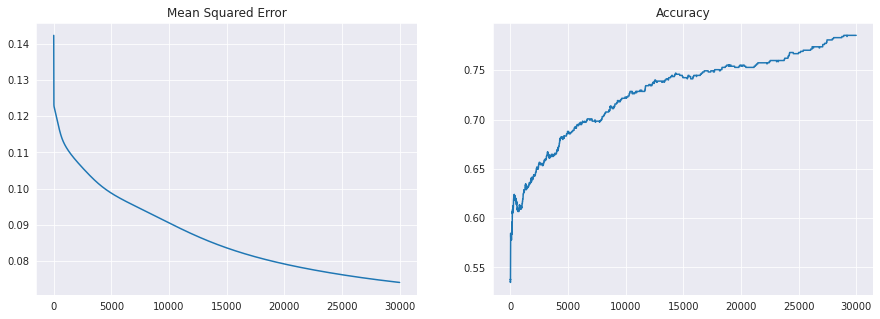

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_train_df.mean_squared_error.plot(ax=axes[0], title='Mean Squared Error')
monitoring_train_df.accuracy.plot(ax=axes[1], title='Accuracy')

Validation

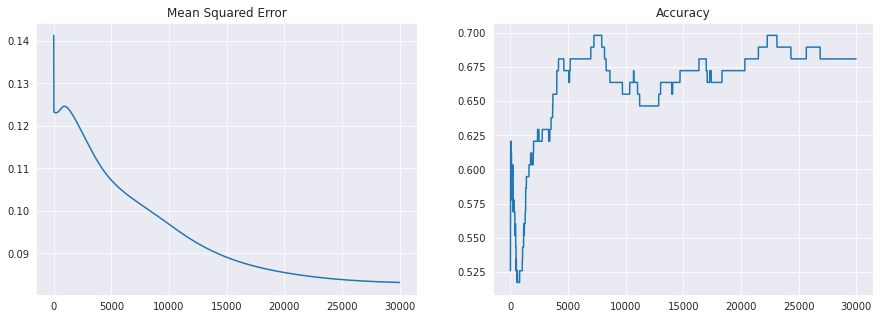

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_val_df.mean_squared_error.plot(ax=axes[0], title='Mean Squared Error')
monitoring_val_df.accuracy.plot(ax=axes[1], title='Accuracy')

Test

In [ ]:
# forward
hidden_layer = sigmoid(np.dot(x_test, w1))
output_layer = sigmoid(np.dot(hidden_layer, w2))

accuracy(output_layer, y_test)

0.7283236994219653

In [ ]:
np.column_stack((y_test[:20], output_layer[:20]))

array([[0.        , 0.65515314],
       [1.        , 0.8438288 ],
       [0.        , 0.80970575],
       [1.        , 0.91793925],
       [0.        , 0.14941264],
       [1.        , 0.30459407],
       [1.        , 0.32067767],
       [1.        , 0.8091413 ],
       [0.        , 0.07235263],
       [1.        , 0.31941906],
       [1.        , 0.28481179],
       [1.        , 0.91560298],
       [0.        , 0.26199708],
       [1.        , 0.40872187],
       [0.        , 0.14374228],
       [1.        , 0.7164223 ],
       [1.        , 0.44225552],
       [0.        , 0.24872589],
       [1.        , 0.8498782 ],
       [1.        , 0.86166059]])